In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [2]:
import tensorflow as tf
# dir(tf.keras.applications)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    except RuntimeError as e:
        # 프로그램 시작시에 가장 장치가 설정되어야만 합니다
        print(e)

[{'box': [47, 61, 84, 125], 'confidence': 0.999790608882904, 'keypoints': {'left_eye': (67, 112), 'right_eye': (110, 112), 'nose': (88, 140), 'mouth_left': (65, 149), 'mouth_right': (111, 149)}}]


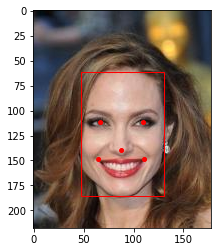

In [4]:
def draw_image_with_boxes(img, result_list):
    # plot the image
    plt.figure()
    plt.imshow(img)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()

img_path = '../data/img_align_celeba/187853.jpg' # 안젤리나 졸리 - test label 5876
img = plt.imread(img_path)
detector = MTCNN()
faces = detector.detect_faces(img)
print(faces)
draw_image_with_boxes(img, faces)